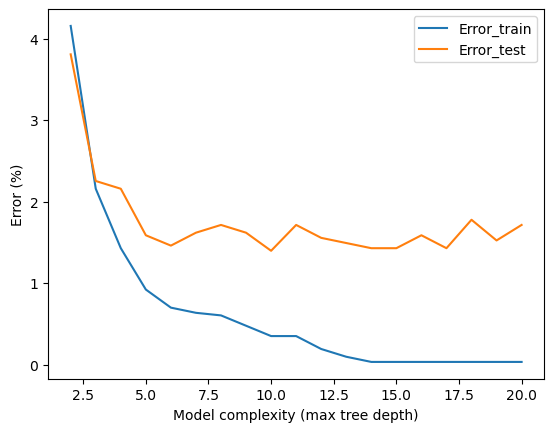

In [1]:
import importlib_resources
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import model_selection, tree

filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine2.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"][0]]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)

# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 21, 1)

# Simple holdout-set crossvalidation
test_proportion = 0.5
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=test_proportion
)

# Initialize variables
Error_train = np.empty((len(tc), 1))
Error_test = np.empty((len(tc), 1))

for i, t in enumerate(tc):
    # Fit decision tree classifier, Gini split criterion, different pruning levels
    dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=t)
    dtc = dtc.fit(X_train, y_train)

    # Evaluate classifier's misclassification rate over train/test data
    y_est_test = np.asarray(dtc.predict(X_test), dtype=int)
    y_est_train = np.asarray(dtc.predict(X_train), dtype=int)
    misclass_rate_test = sum(y_est_test != y_test) / float(len(y_est_test))
    misclass_rate_train = sum(y_est_train != y_train) / float(len(y_est_train))
    Error_test[i], Error_train[i] = misclass_rate_test, misclass_rate_train

f = plt.figure()
plt.plot(tc, Error_train * 100)
plt.plot(tc, Error_test * 100)
plt.xlabel("Model complexity (max tree depth)")
plt.ylabel("Error (%)")
plt.legend(["Error_train", "Error_test"])

plt.show()

Computing CV fold: 1/10..
Computing CV fold: 2/10..
Computing CV fold: 3/10..
Computing CV fold: 4/10..
Computing CV fold: 5/10..
Computing CV fold: 6/10..
Computing CV fold: 7/10..
Computing CV fold: 8/10..
Computing CV fold: 9/10..
Computing CV fold: 10/10..


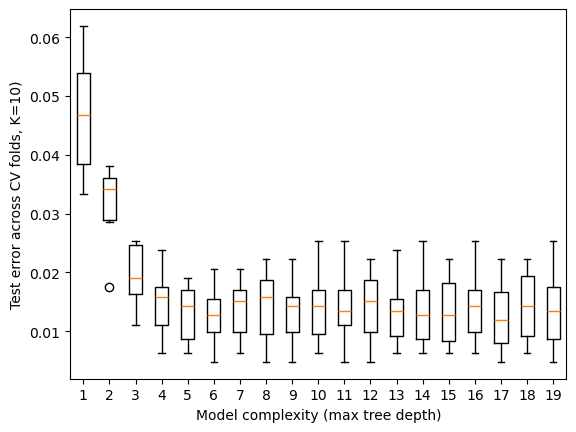

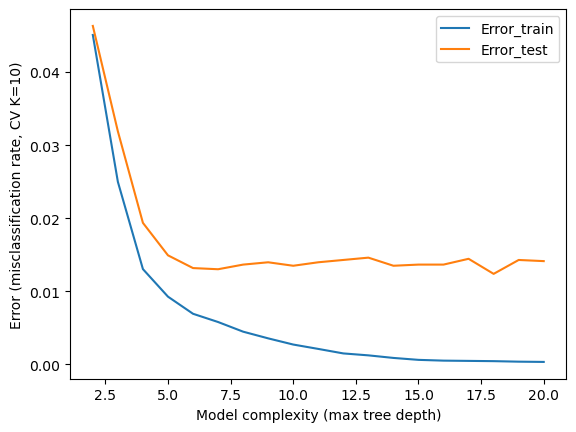

In [4]:
import importlib_resources
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import model_selection, tree

filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine2.mat")
# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"][0]]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)

# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 21, 1)

# K-fold crossvalidation
K = 10
CV = model_selection.KFold(n_splits=K, shuffle=True)

# Initialize variable
Error_train = np.empty((len(tc), K))
Error_test = np.empty((len(tc), K))

k = 0
for train_index, test_index in CV.split(X):
    print("Computing CV fold: {0}/{1}..".format(k + 1, K))

    # extract training and test set for current CV fold
    X_train, y_train = X[train_index, :], y[train_index]
    X_test, y_test = X[test_index, :], y[test_index]

    for i, t in enumerate(tc):
        # Fit decision tree classifier, Gini split criterion, different pruning levels
        dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=t)
        dtc = dtc.fit(X_train, y_train.ravel())
        y_est_test = dtc.predict(X_test)
        y_est_train = dtc.predict(X_train)
        # Evaluate misclassification rate over train/test data (in this CV fold)
        misclass_rate_test = np.sum(y_est_test != y_test) / float(len(y_est_test))
        misclass_rate_train = np.sum(y_est_train != y_train) / float(len(y_est_train))
        Error_test[i, k], Error_train[i, k] = misclass_rate_test, misclass_rate_train
    k += 1


f = plt.figure()
plt.boxplot(Error_test.T)
plt.xlabel("Model complexity (max tree depth)")
plt.ylabel("Test error across CV folds, K={0})".format(K))

f = plt.figure()
plt.plot(tc, Error_train.mean(1))
plt.plot(tc, Error_test.mean(1))
plt.xlabel("Model complexity (max tree depth)")
plt.ylabel("Error (misclassification rate, CV K={0})".format(K))
plt.legend(["Error_train", "Error_test"])

plt.show()

Optimal Depth: Run your script and check the depth with the lowest mean error. Share the output if you want a specific answer!
Random Splits: Without a fixed random_state, results will vary slightly. Try running it 3-5 times to see the range of optimal depths.
100-Fold or LOO: For a small dataset (<1000 samples), try both. For larger datasets, 100-fold is more practical than LOO due to runtime.

## Multiple layered cross validation

Cross validation fold 1/5
Train indices: [ 0  1  3  5  6  7  8  9 10 11 12 14 15 16 17 19 21 22 23 24 26 27 28 29]
Test indices: [ 2  4 13 18 20 25]
Features no: 5

Cross validation fold 2/5
Train indices: [ 0  1  2  3  4  7  8  9 10 13 14 15 16 18 19 20 21 22 23 24 25 27 28 29]
Test indices: [ 5  6 11 12 17 26]
Features no: 7

Cross validation fold 3/5
Train indices: [ 1  2  3  4  5  6  8  9 11 12 13 14 15 17 18 20 22 23 24 25 26 27 28 29]
Test indices: [ 0  7 10 16 19 21]
Features no: 7

Cross validation fold 4/5
Train indices: [ 0  2  3  4  5  6  7  8 10 11 12 13 15 16 17 18 19 20 21 24 25 26 28 29]
Test indices: [ 1  9 14 22 23 27]
Features no: 10

Cross validation fold 5/5
Train indices: [ 0  1  2  4  5  6  7  9 10 11 12 13 14 16 17 18 19 20 21 22 23 25 26 27]
Test indices: [ 3  8 15 24 28 29]
Features no: 8



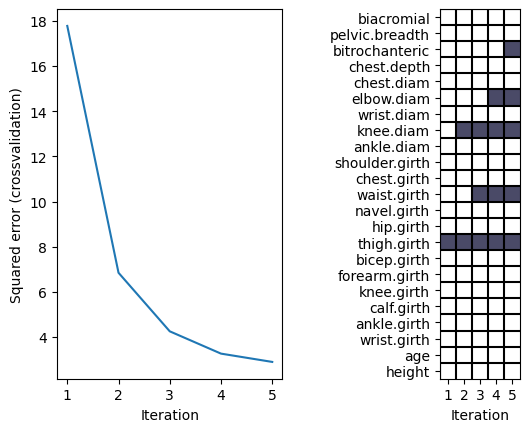

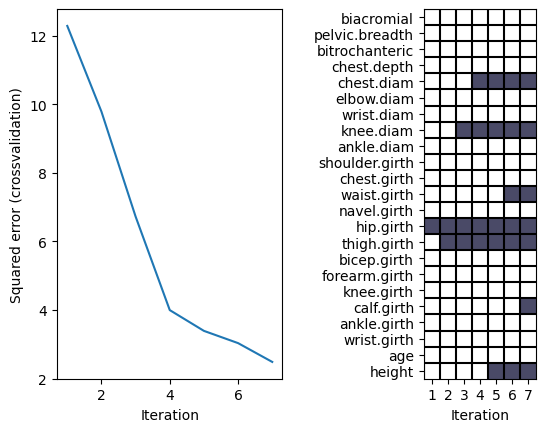

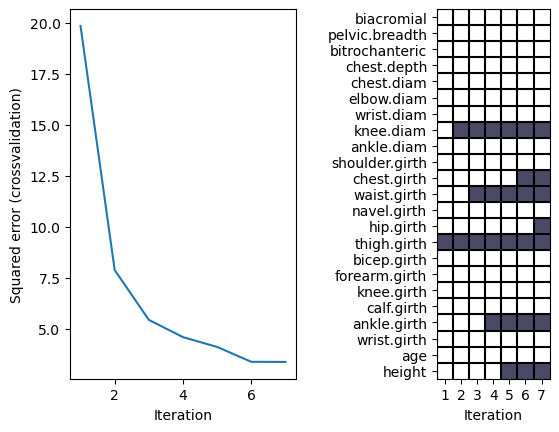

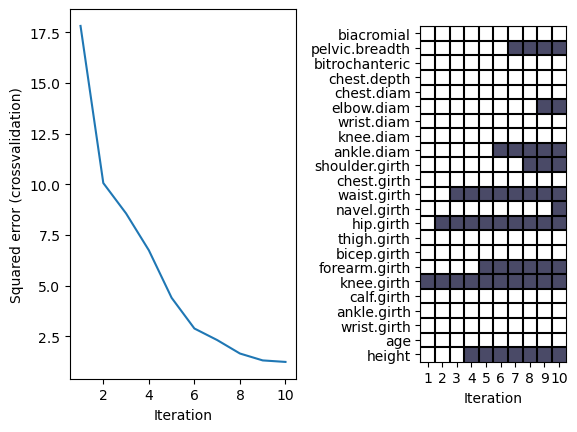

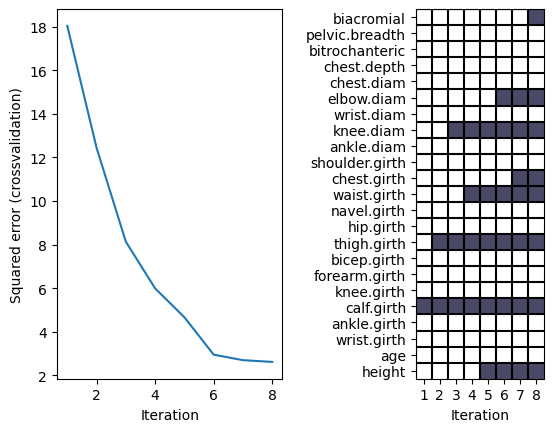

In [7]:
import importlib_resources
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import model_selection

from dtuimldmtools import bmplot, feature_selector_lr

filename = importlib_resources.files("dtuimldmtools").joinpath("data/body.mat")
# Load data from matlab file
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"][0]]
N, M = X.shape


## Crossvalidation
# Create crossvalidation partition for evaluation
K = 5
CV = model_selection.KFold(n_splits=K, shuffle=True)

# Initialize variables
Features = np.zeros((M, K))
Error_train = np.empty((K, 1))
Error_test = np.empty((K, 1))
Error_train_fs = np.empty((K, 1))
Error_test_fs = np.empty((K, 1))
Error_train_nofeatures = np.empty((K, 1))
Error_test_nofeatures = np.empty((K, 1))

k = 0
# Each fold has a different train and test set
# In each fold, finds the best set of features with the lowest lot and plot it out
for train_index, test_index in CV.split(X):

    # extract training and test set for current CV fold
    X_train = X[train_index, :]
    y_train = y[train_index]
    X_test = X[test_index, :]
    y_test = y[test_index]
    internal_cross_validation = 10

    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = (
        np.square(y_train - y_train.mean()).sum() / y_train.shape[0]
    )
    Error_test_nofeatures[k] = np.square(y_test - y_test.mean()).sum() / y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train - m.predict(X_train)).sum() / y_train.shape[0]
    Error_test[k] = np.square(y_test - m.predict(X_test)).sum() / y_test.shape[0]

    # Compute squared error with feature subset selection
    textout = ""
    selected_features, features_record, loss_record = feature_selector_lr(
        X_train, y_train, internal_cross_validation, display=textout
    )

    Features[selected_features, k] = 1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) == 0:
        print(
            "No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y)."
        )
    else:
        m = lm.LinearRegression(fit_intercept=True).fit(
            X_train[:, selected_features], y_train
        )
        Error_train_fs[k] = (
            np.square(y_train - m.predict(X_train[:, selected_features])).sum()
            / y_train.shape[0]
        )
        Error_test_fs[k] = (
            np.square(y_test - m.predict(X_test[:, selected_features])).sum()
            / y_test.shape[0]
        )

        plt.figure(k)
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(loss_record)), loss_record[1:])
        plt.xlabel("Iteration")
        plt.ylabel("Squared error (crossvalidation)")

        plt.subplot(1, 3, 3)
        bmplot(
            attributeNames, range(1, features_record.shape[1]), -features_record[:, 1:]
        )
        plt.clim(-1.5, 0)
        plt.xlabel("Iteration")

    print("Cross validation fold {0}/{1}".format(k + 1, K))
    print("Train indices: {0}".format(train_index))
    print("Test indices: {0}".format(test_index))
    print("Features no: {0}\n".format(selected_features.size))

    k += 1
plt.show()



Linear regression without feature selection:

- Training error: 4.1205886430584476e-26
- Test error:     826.4085618066038
- R^2 train:     1.0
- R^2 test:     -14.335116232278821
Linear regression with feature selection:

- Training error: 1.510448151982172
- Test error:     8.290570545244577
- R^2 train:     0.9781194514338468
- R^2 test:     0.8461573744283335


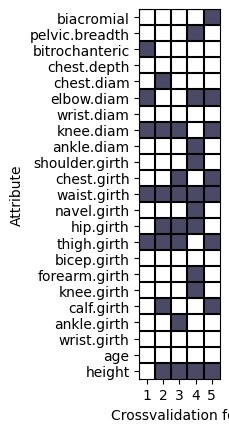

In [8]:
# Display results (Average of all the interations)
print("\n")
print("Linear regression without feature selection:\n")
print("- Training error: {0}".format(Error_train.mean()))
print("- Test error:     {0}".format(Error_test.mean()))
print(
    "- R^2 train:     {0}".format(
        (Error_train_nofeatures.sum() - Error_train.sum())
        / Error_train_nofeatures.sum()
    )
)
print(
    "- R^2 test:     {0}".format(
        (Error_test_nofeatures.sum() - Error_test.sum()) / Error_test_nofeatures.sum()
    )
)
print("Linear regression with feature selection:\n")
print("- Training error: {0}".format(Error_train_fs.mean()))
print("- Test error:     {0}".format(Error_test_fs.mean()))
print(
    "- R^2 train:     {0}".format(
        (Error_train_nofeatures.sum() - Error_train_fs.sum())
        / Error_train_nofeatures.sum()
    )
)
print(
    "- R^2 test:     {0}".format(
        (Error_test_nofeatures.sum() - Error_test_fs.sum())
        / Error_test_nofeatures.sum()
    )
)

plt.figure(k)
plt.subplot(1, 3, 2)
bmplot(attributeNames, range(1, Features.shape[1] + 1), -Features)
plt.clim(-1.5, 0)
plt.xlabel("Crossvalidation fold")
plt.ylabel("Attribute")

plt.show()

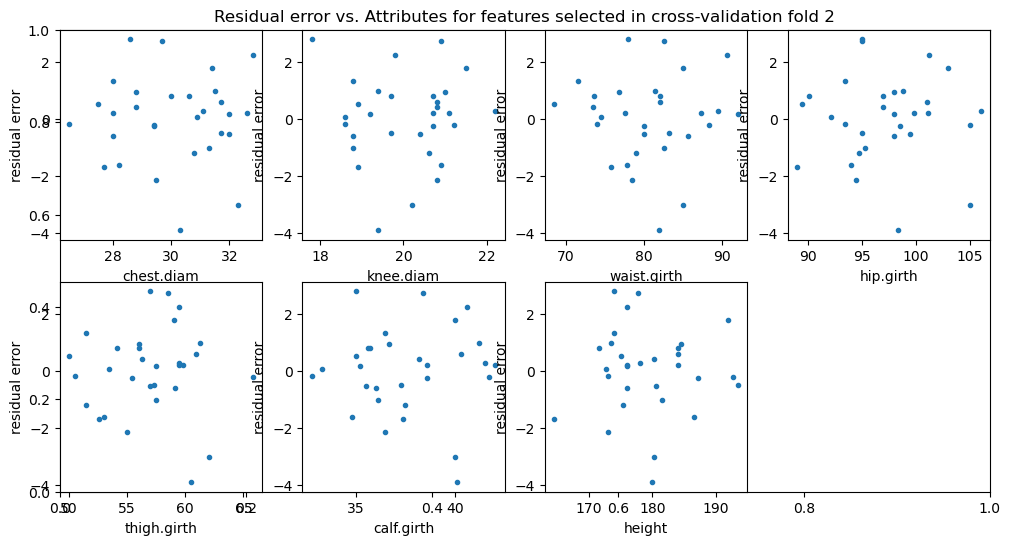

In [9]:
# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual

f = 2  # cross-validation fold to inspect
# Return the indices of the elements that are non-zero.

ff = Features[:, f - 1].nonzero()[0]
if len(ff) == 0:
    print(
        "\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y)."
    )
else:
    m = lm.LinearRegression(fit_intercept=True).fit(X[:, ff], y)

    y_est = m.predict(X[:, ff])
    residual = y - y_est

    plt.figure(k + 1, figsize=(12, 6))
    plt.title(
        "Residual error vs. Attributes for features selected in cross-validation fold {0}".format(
            f
        )
    )
    for i in range(0, len(ff)):
        plt.subplot(2, int(np.ceil(len(ff) / 2)), i + 1)
        plt.plot(X[:, ff[i]], residual, ".")
        plt.xlabel(attributeNames[ff[i]])
        plt.ylabel("residual error")
plt.show()

## KNN

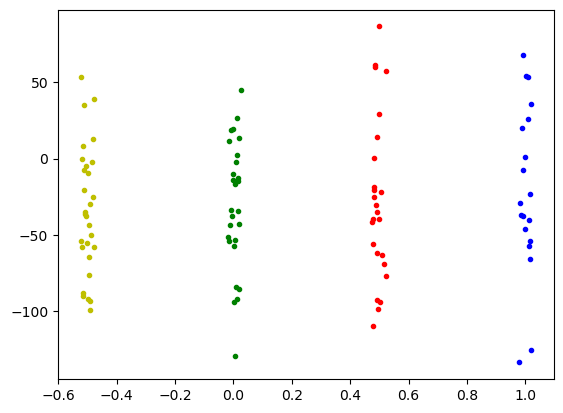

In [10]:
import importlib_resources
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

filename = importlib_resources.files("dtuimldmtools").joinpath(
    "data/synth3.mat"
)  # <-- change the number to change dataset

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
X_train = mat_data["X_train"]
X_test = mat_data["X_test"]
y = mat_data["y"].squeeze()
y_train = mat_data["y_train"].squeeze()
y_test = mat_data["y_test"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)


# Plot the training data points (color-coded) and test data points.
plt.figure(1)
styles = [".b", ".r", ".g", ".y"]
for c in range(C):
    class_mask = y_train == c
    plt.plot(X_train[class_mask, 0], X_train[class_mask, 1], styles[c])
plt.show()

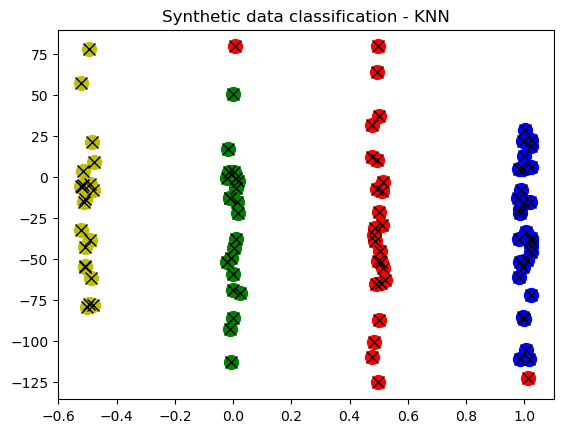

In [22]:
# K-nearest neighbors
K = 5

# Distance metric (corresponds to 2nd norm, euclidean distance).
# You can set dist=1 to obtain manhattan distance (cityblock distance).
dist = 2
# metric = "minkowski"
metric_params = {}  # no parameters needed for minkowski

# You can set the metric argument to 'cosine' to determine the cosine distance
# metric = 'cosine'
# metric_params = {} # no parameters needed for cosine

# To use a mahalonobis distance, we need to input the covariance matrix, too:
metric='mahalanobis'
metric_params={'V': np.cov(X_train, rowvar=False)}

# Fit classifier and classify the test points
knclassifier = KNeighborsClassifier(
    n_neighbors=K, p=dist, metric=metric, metric_params=metric_params
)
knclassifier.fit(X_train, y_train)
y_est = knclassifier.predict(X_test)


# Plot the classfication results
styles = ["ob", "or", "og", "oy"]
for c in range(C):
    class_mask = y_est == c
    plt.plot(X_test[class_mask, 0], X_test[class_mask, 1], styles[c], markersize=10)
    plt.plot(X_test[class_mask, 0], X_test[class_mask, 1], "kx", markersize=8)
plt.title("Synthetic data classification - KNN")
plt.show()

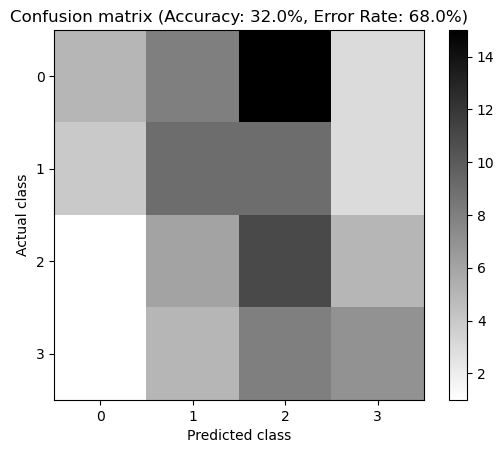

In [12]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_est)
accuracy = 100 * cm.diagonal().sum() / cm.sum()
error_rate = 100 - accuracy
plt.figure(2)
plt.imshow(cm, cmap="binary", interpolation="None")
plt.colorbar()
plt.xticks(range(C))
plt.yticks(range(C))
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title(
    "Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)".format(accuracy, error_rate)
)
plt.show()

## Iris dataset

In [23]:
# exercise 1.5.1
import importlib_resources
import numpy as np
import pandas as pd

# Load the Iris csv data using the Pandas library
filename = importlib_resources.files("dtuimldmtools").joinpath("data/iris.csv")

# Print the location of the iris.csv file on your computer.
# You should inspect it manually to understand the format and content
print("\nLocation of the iris.csv file: {}".format(filename))

# Load the iris.csv file using pandas
# Note you do not need to undersatnd the details of the panda package
df = pd.read_csv(filename)

# Pandas returns a dataframe, (df) which could be used for handling the data.
# We will however convert the dataframe to numpy arrays for this course as
# is also described in the table in the exercise
raw_data = df.values

# Notice that raw_data both contains the information we want to store in an array
# X (the sepal and petal dimensions) and the information that we wish to store
# in y (the class labels, that is the iris species).

# We start by making the data matrix X by indexing into data.
# We know that the attributes are stored in the four columns from inspecting
# the file.
cols = range(0, 4)
X = raw_data[:, cols]

# We can extract the attribute names that came from the header of the csv
attributeNames = np.asarray(df.columns[cols])

# Before we can store the class index, we need to convert the strings that
# specify the class of a given object to a numerical value. We start by
# extracting the strings for each sample from the raw data loaded from the csv:
classLabels = raw_data[:, -1]  # -1 takes the last column
# Then determine which classes are in the data by finding the set of
# unique class labels
classNames = np.unique(classLabels)

# We can assign each type of Iris class with a number by making a
# Python dictionary as so:

classDict = dict(zip(classNames, range(len(classNames))))

# The function zip simply "zips" togetter the classNames with an integer,
# like a zipper on a jacket.
# For instance, you could zip a list ['A', 'B', 'C'] with ['D', 'E', 'F'] to
# get the pairs ('A','D'), ('B', 'E'), and ('C', 'F').
# A Python dictionary is a data object that stores pairs of a key with a value.
# This means that when you call a dictionary with a given key, you
# get the stored corresponding value. Try highlighting classDict and press F9.
# You'll see that the first (key, value)-pair is ('Iris-setosa', 0).
# If you look up in the dictionary classDict with the value 'Iris-setosa',
# you will get the value 0. Try it with classDict['Iris-setosa']

# With the dictionary, we can look up each data objects class label (the string)
# in the dictionary, and determine which numerical value that object is
# assigned. This is the class index vector y:

y = np.array([classDict[cl] for cl in classLabels])

# In the above, we have used the concept of "list comprehension", which
# is a compact way of performing some operations on a list or array.
# You could read the line  "For each class label (cl) in the array of
# class labels (classLabels), use the class label (cl) as the key and look up
# in the class dictionary (classDict). Store the result for each class label
# as an element in a list (because of the brackets []). Finally, convert the
# list to a numpy array".
# Try running this to get a feel for the operation:
# list = [0,1,2]
# new_list = [element+10 for element in list]

# We can determine the number of data objects and number of attributes using
# the shape of X
N, M = X.shape

# Finally, the last variable that we need to have the dataset in the
# "standard representation" for the course, is the number of classes, C:
C = len(classNames)

print("Ran 1.5.1 -- loaded the Iris data")


Location of the iris.csv file: /home/monkescripts/anaconda3/lib/python3.12/site-packages/dtuimldmtools/data/iris.csv
Ran 1.5.1 -- loaded the Iris data


Crossvalidation fold: 1/150
Crossvalidation fold: 2/150
Crossvalidation fold: 3/150
Crossvalidation fold: 4/150
Crossvalidation fold: 5/150
Crossvalidation fold: 6/150
Crossvalidation fold: 7/150
Crossvalidation fold: 8/150
Crossvalidation fold: 9/150
Crossvalidation fold: 10/150
Crossvalidation fold: 11/150
Crossvalidation fold: 12/150
Crossvalidation fold: 13/150
Crossvalidation fold: 14/150
Crossvalidation fold: 15/150
Crossvalidation fold: 16/150
Crossvalidation fold: 17/150
Crossvalidation fold: 18/150
Crossvalidation fold: 19/150
Crossvalidation fold: 20/150
Crossvalidation fold: 21/150
Crossvalidation fold: 22/150
Crossvalidation fold: 23/150
Crossvalidation fold: 24/150
Crossvalidation fold: 25/150
Crossvalidation fold: 26/150
Crossvalidation fold: 27/150
Crossvalidation fold: 28/150
Crossvalidation fold: 29/150
Crossvalidation fold: 30/150
Crossvalidation fold: 31/150
Crossvalidation fold: 32/150
Crossvalidation fold: 33/150
Crossvalidation fold: 34/150
Crossvalidation fold: 3

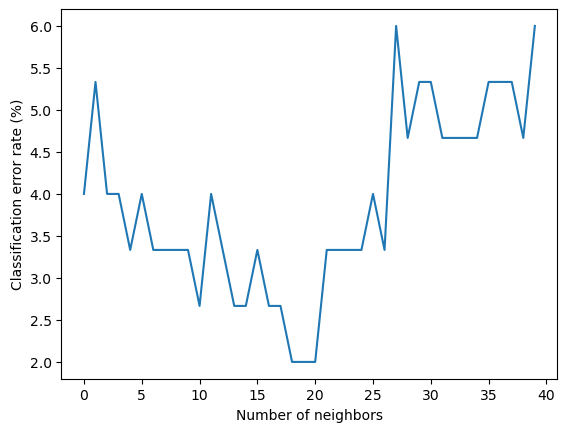

Ran Exercise 6.3.2


In [24]:
# exercise 6.3.2

import numpy as np

# requires data from exercise 1.5.1
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

# Maximum number of neighbors
L = 40

CV = model_selection.LeaveOneOut()
errors = np.zeros((N, L))
i = 0
for train_index, test_index in CV.split(X, y):
    print("Crossvalidation fold: {0}/{1}".format(i + 1, N))

    # extract training and test set for current CV fold
    X_train = X[train_index, :]
    y_train = y[train_index]
    X_test = X[test_index, :]
    y_test = y[test_index]

    # Fit classifier and classify the test points (consider 1 to 40 neighbors)
    for l in range(1, L + 1):
        knclassifier = KNeighborsClassifier(n_neighbors=l)
        knclassifier.fit(X_train, y_train)
        y_est = knclassifier.predict(X_test)
        errors[i, l - 1] = np.sum(y_est[0] != y_test[0])

    i += 1

# Plot the classification error rate
plt.figure()
plt.plot(100 * sum(errors, 0) / N)
plt.xlabel("Number of neighbors")
plt.ylabel("Classification error rate (%)")
plt.show()

print("Ran Exercise 6.3.2")
